In [15]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.8 MB 5.3 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.8 MB 7.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.8 MB 8.9 MB/s eta 0:00:01
   ---------- ----------------------------- 2.6/9.8 MB 10.5 MB/s eta 0:00:01
   ------------- -------------------------- 3.2/9.8 MB 11.5 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.8 MB 11.6 MB/s eta 0:00:01
   ------------------- -------------------- 4.8/9.8 MB 12.3 MB/s eta 0:00:01
   ---------------------- ----------------- 5.6/9.8 MB 12.2 MB/s eta 0:00:01
   ------------------------- -------------- 6.2/9.8 MB 12.3 MB/s eta 0:00:01
   ---------------------------- ----------- 7.0/9.8 MB 12.7 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.8 MB 13.0 MB/s eta 0:00:01
   --------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Bibliotecas necessarias

In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler

# Carregando os dados

In [5]:
# Caminho para o arquivo de dados bruto
raw_data_path = '../data/raw/historical_stock_data.csv'

# Carrega os dados, ignorando a coluna de índice se existir
df = pd.read_csv(raw_data_path, index_col=0)


In [6]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1962-01-02 00:00:00+00:00,0.046733,0.263021,0.270182,0.263021,0.263021,806400
1,1962-01-03 00:00:00+00:00,0.045692,0.257161,0.259115,0.253255,0.259115,1574400
2,1962-01-04 00:00:00+00:00,0.046039,0.259115,0.261068,0.257813,0.257813,844800
3,1962-01-05 00:00:00+00:00,0.044998,0.253255,0.262370,0.252604,0.259115,1420800
4,1962-01-08 00:00:00+00:00,0.044535,0.250651,0.251302,0.245768,0.251302,2035200


In [7]:
# Convertendo a coluna 'Date' para datetime
df['Date'] = pd.to_datetime(df['Date'])

# Removendo a parte da hora e mantendo apenas a data
df['Date'] = df['Date'].dt.date

# Verificar a estrutura do DataFrame para garantir que a conversão foi aplicada
print("Estrutura do DataFrame após conversão da data:")
print(df.head())

Estrutura do DataFrame após conversão da data:
         Date  Adj Close     Close      High       Low      Open   Volume
0  1962-01-02   0.046733  0.263021  0.270182  0.263021  0.263021   806400
1  1962-01-03   0.045692  0.257161  0.259115  0.253255  0.259115  1574400
2  1962-01-04   0.046039  0.259115  0.261068  0.257813  0.257813   844800
3  1962-01-05   0.044998  0.253255  0.262370  0.252604  0.259115  1420800
4  1962-01-08   0.044535  0.250651  0.251302  0.245768  0.251302  2035200


# Verificando e Removendo Valores Nulos

In [8]:
# Verifica se há valores ausentes
print("Valores ausentes por coluna:\n", df.isnull().sum())

# Remove valores ausentes
df.dropna(inplace=True)


Valores ausentes por coluna:
 Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


# Representações Gráfiacas

Série temporal

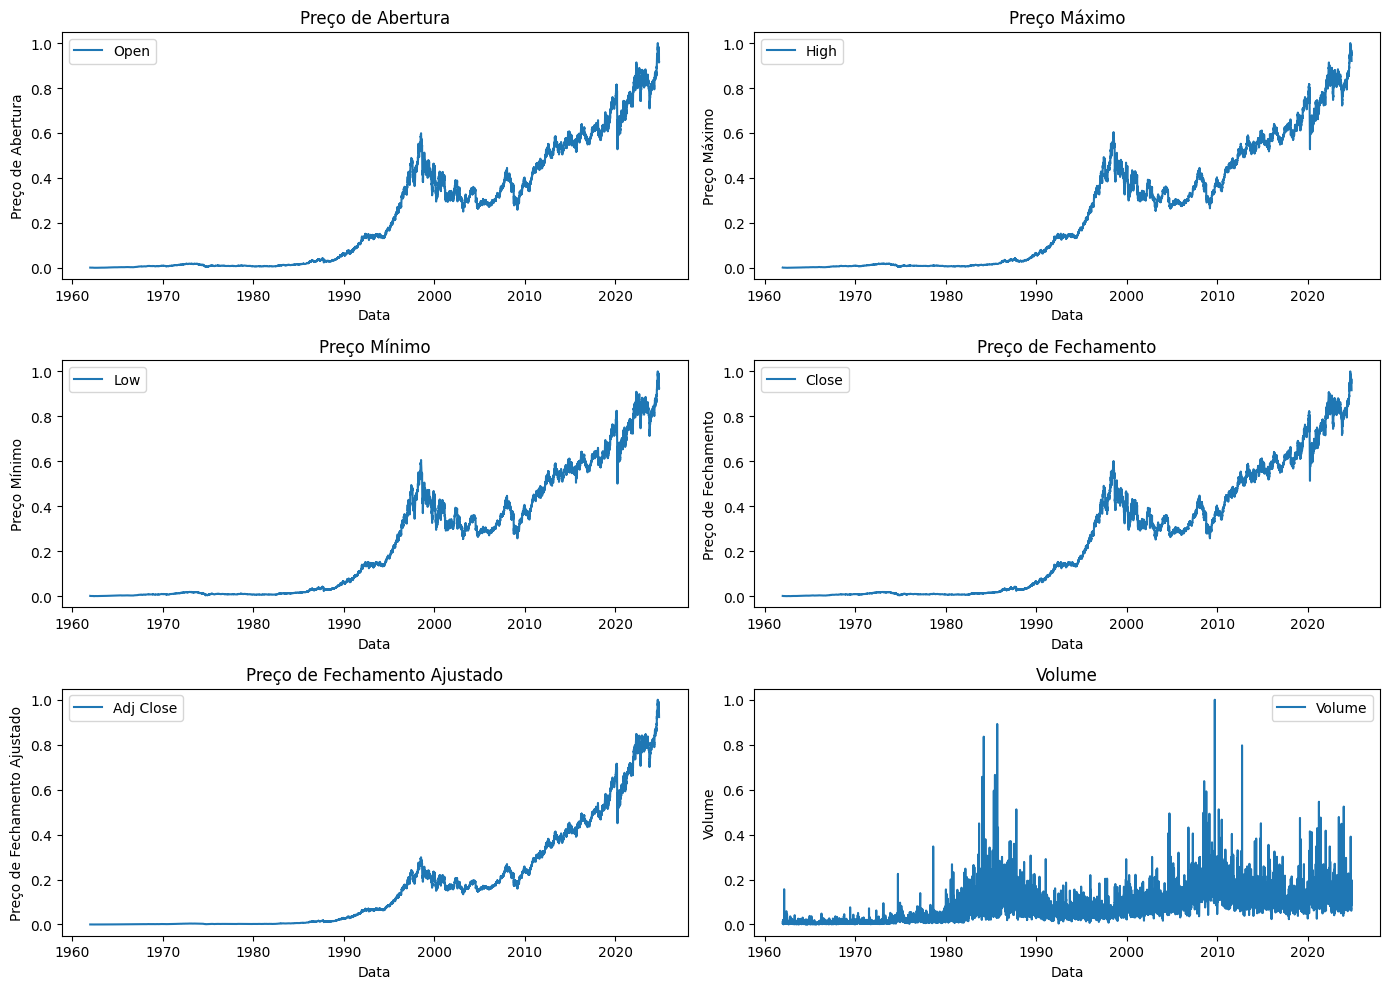

In [12]:
# Plotando a série temporal
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(df['Date'], df['Open'], label='Open')
plt.title('Preço de Abertura')
plt.xlabel('Data')
plt.ylabel('Preço de Abertura')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(df['Date'], df['High'], label='High')
plt.title('Preço Máximo')
plt.xlabel('Data')
plt.ylabel('Preço Máximo')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(df['Date'], df['Low'], label='Low')
plt.title('Preço Mínimo')
plt.xlabel('Data')
plt.ylabel('Preço Mínimo')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(df['Date'], df['Close'], label='Close')
plt.title('Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(df['Date'], df['Adj Close'], label='Adj Close')
plt.title('Preço de Fechamento Ajustado')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.title('Volume')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

Distribuição dos Dados

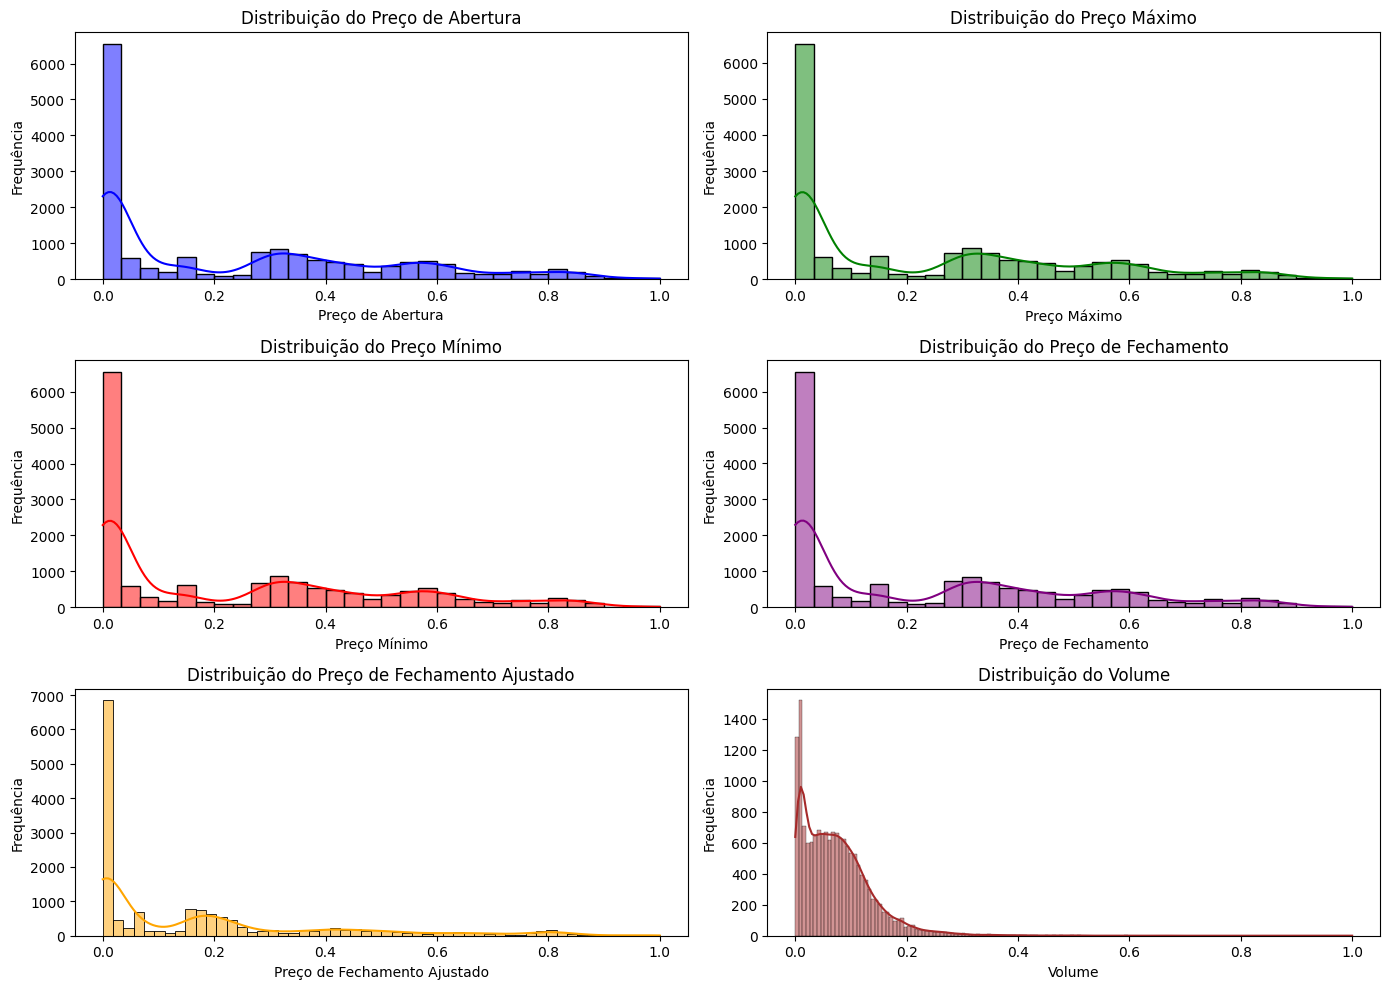

In [13]:
# Distribuição dos dados
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.histplot(df['Open'], kde=True, color='blue')
plt.title('Distribuição do Preço de Abertura')
plt.xlabel('Preço de Abertura')
plt.ylabel('Frequência')

plt.subplot(3, 2, 2)
sns.histplot(df['High'], kde=True, color='green')
plt.title('Distribuição do Preço Máximo')
plt.xlabel('Preço Máximo')
plt.ylabel('Frequência')

plt.subplot(3, 2, 3)
sns.histplot(df['Low'], kde=True, color='red')
plt.title('Distribuição do Preço Mínimo')
plt.xlabel('Preço Mínimo')
plt.ylabel('Frequência')

plt.subplot(3, 2, 4)
sns.histplot(df['Close'], kde=True, color='purple')
plt.title('Distribuição do Preço de Fechamento')
plt.xlabel('Preço de Fechamento')
plt.ylabel('Frequência')

plt.subplot(3, 2, 5)
sns.histplot(df['Adj Close'], kde=True, color='orange')
plt.title('Distribuição do Preço de Fechamento Ajustado')
plt.xlabel('Preço de Fechamento Ajustado')
plt.ylabel('Frequência')

plt.subplot(3, 2, 6)
sns.histplot(df['Volume'], kde=True, color='brown')
plt.title('Distribuição do Volume')
plt.xlabel('Volume')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Análise de Autocorrelação e Autocorrelação Parcial

<Figure size 1400x700 with 0 Axes>

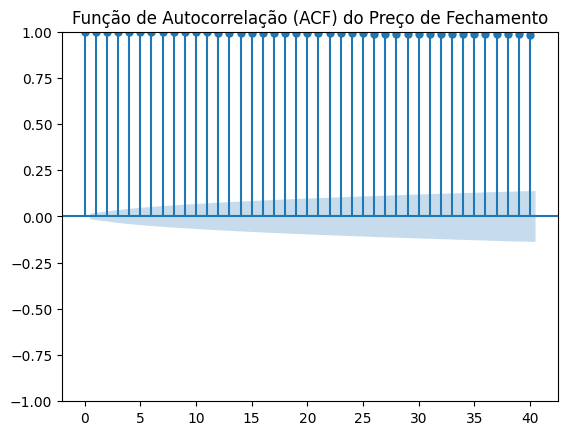

<Figure size 1400x700 with 0 Axes>

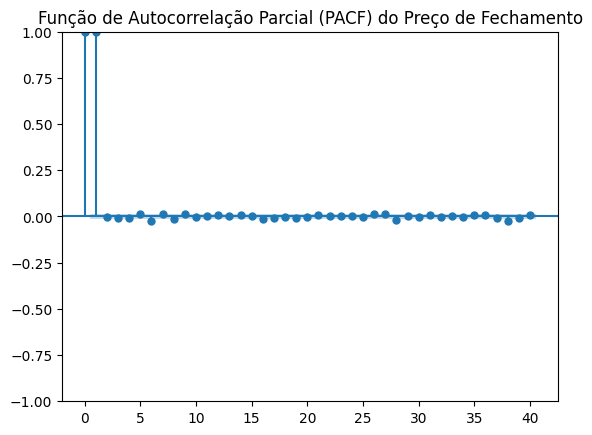

In [17]:
# Autocorrelação
plt.figure(figsize=(14, 7))
plot_acf(df['Close'], lags=40)
plt.title('Função de Autocorrelação (ACF) do Preço de Fechamento')
plt.show()

# Autocorrelação Parcial
plt.figure(figsize=(14, 7))
plot_pacf(df['Close'], lags=40)
plt.title('Função de Autocorrelação Parcial (PACF) do Preço de Fechamento')
plt.show()

# Normalizando os dados

In [10]:
# Normalizando as colunas numéricas, exceto a coluna 'Date'
scaler = MinMaxScaler(feature_range=(0, 1))
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Verificar a estrutura do DataFrame para garantir que a normalização foi aplicada
print("Estrutura do DataFrame Normalizado:")
print(df.head())

# Caminho para salvar o arquivo normalizado
processed_data_path = '../data/processed'
os.makedirs(processed_data_path, exist_ok=True)

# Salvar o DataFrame normalizado em CSV
df.to_csv(os.path.join(processed_data_path, 'normalized_stock_data.csv'), index=False)



Estrutura do DataFrame Normalizado:
         Date  Adj Close     Close      High       Low      Open    Volume
0  1962-01-02   0.000167  0.000975  0.001048  0.001120  0.000962  0.005879
1  1962-01-03   0.000153  0.000894  0.000897  0.000985  0.000908  0.012068
2  1962-01-04   0.000158  0.000921  0.000923  0.001048  0.000891  0.006189
3  1962-01-05   0.000143  0.000840  0.000941  0.000976  0.000908  0.010831
4  1962-01-08   0.000137  0.000805  0.000790  0.000881  0.000801  0.015782


# Representação gráfica da Série Temporal Normalizada

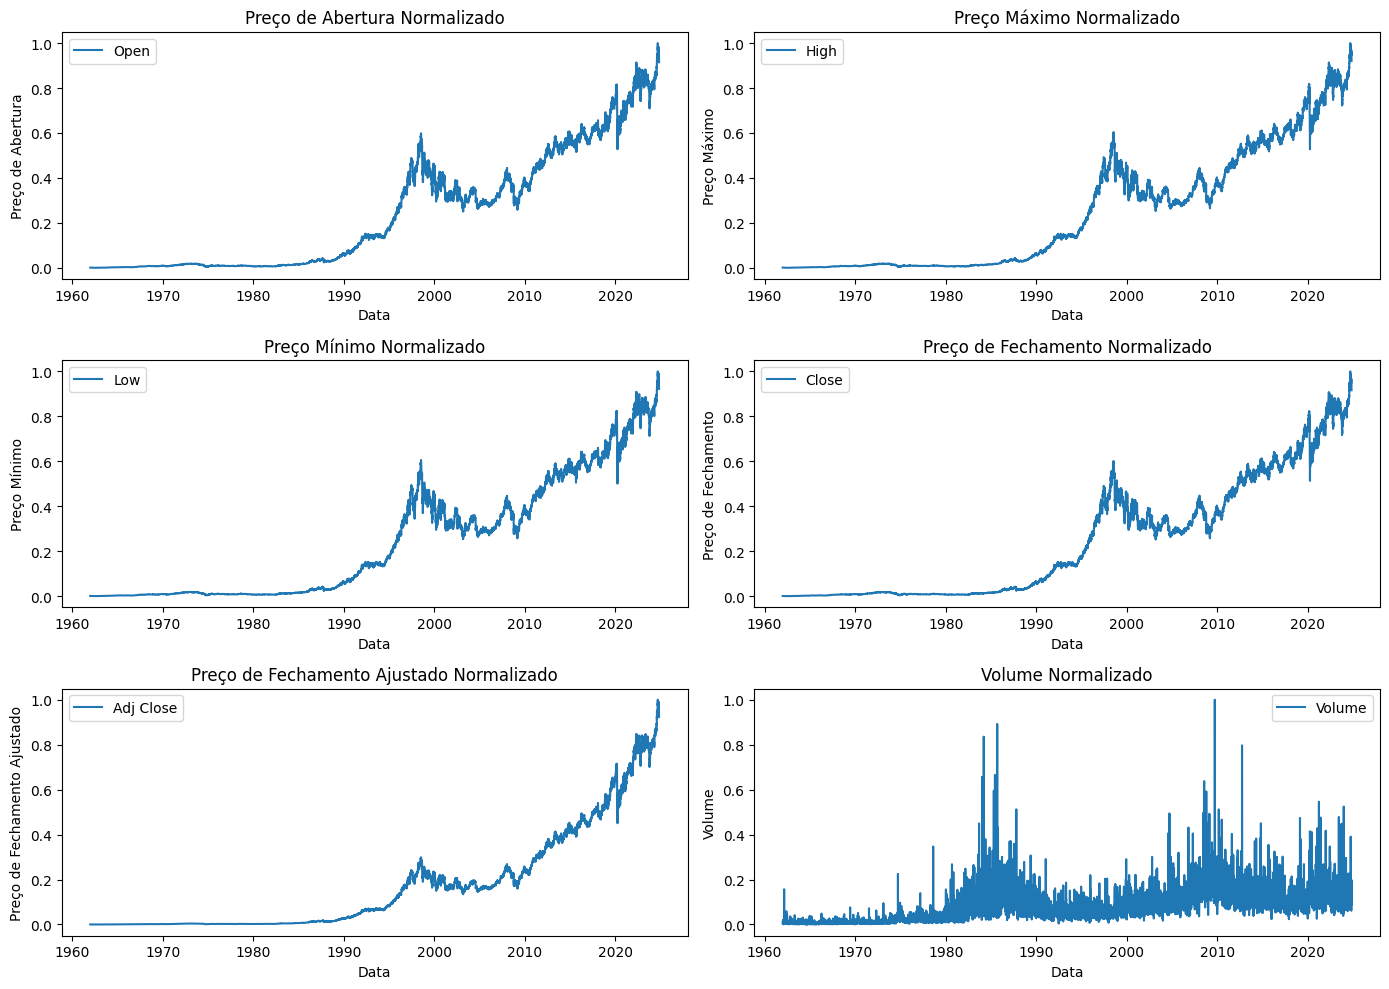

In [11]:
# Plotando a série temporal normalizada
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(df['Date'], df['Open'], label='Open')
plt.title('Preço de Abertura Normalizado')
plt.xlabel('Data')
plt.ylabel('Preço de Abertura')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(df['Date'], df['High'], label='High')
plt.title('Preço Máximo Normalizado')
plt.xlabel('Data')
plt.ylabel('Preço Máximo')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(df['Date'], df['Low'], label='Low')
plt.title('Preço Mínimo Normalizado')
plt.xlabel('Data')
plt.ylabel('Preço Mínimo')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(df['Date'], df['Close'], label='Close')
plt.title('Preço de Fechamento Normalizado')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(df['Date'], df['Adj Close'], label='Adj Close')
plt.title('Preço de Fechamento Ajustado Normalizado')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento Ajustado')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.title('Volume Normalizado')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

# Distribuição dos dados normalizados

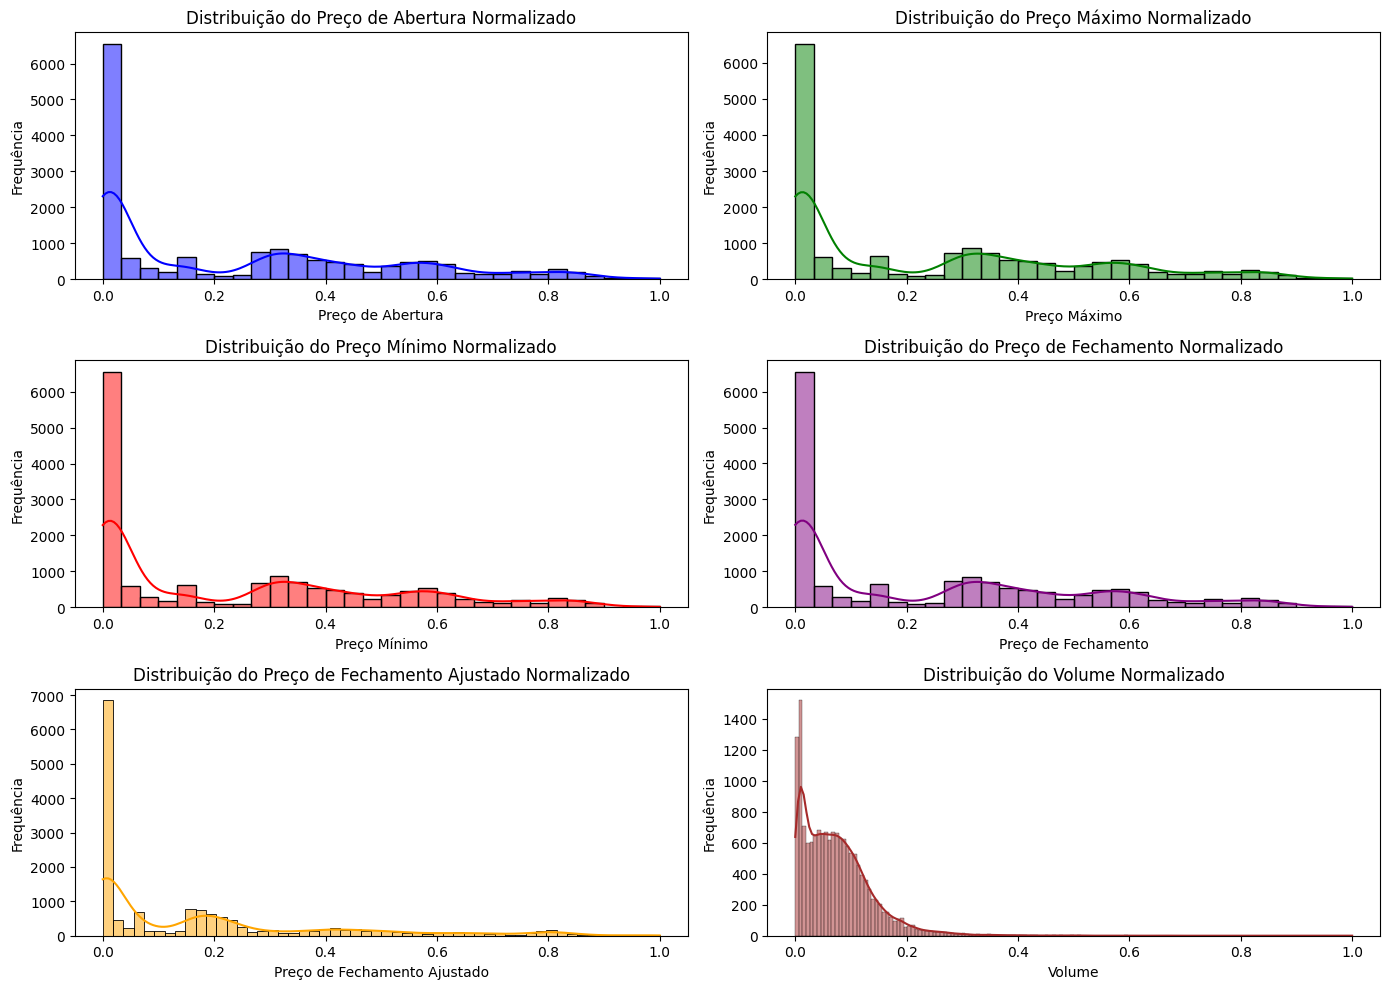

In [19]:
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.histplot(df['Open'], kde=True, color='blue')
plt.title('Distribuição do Preço de Abertura Normalizado')
plt.xlabel('Preço de Abertura')
plt.ylabel('Frequência')

plt.subplot(3, 2, 2)
sns.histplot(df['High'], kde=True, color='green')
plt.title('Distribuição do Preço Máximo Normalizado')
plt.xlabel('Preço Máximo')
plt.ylabel('Frequência')

plt.subplot(3, 2, 3)
sns.histplot(df['Low'], kde=True, color='red')
plt.title('Distribuição do Preço Mínimo Normalizado')
plt.xlabel('Preço Mínimo')
plt.ylabel('Frequência')

plt.subplot(3, 2, 4)
sns.histplot(df['Close'], kde=True, color='purple')
plt.title('Distribuição do Preço de Fechamento Normalizado')
plt.xlabel('Preço de Fechamento')
plt.ylabel('Frequência')

plt.subplot(3, 2, 5)
sns.histplot(df['Adj Close'], kde=True, color='orange')
plt.title('Distribuição do Preço de Fechamento Ajustado Normalizado')
plt.xlabel('Preço de Fechamento Ajustado')
plt.ylabel('Frequência')

plt.subplot(3, 2, 6)
sns.histplot(df['Volume'], kde=True, color='brown')
plt.title('Distribuição do Volume Normalizado')
plt.xlabel('Volume')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Análise de Autocorrelação e Autocorrelação Parcial dos Dados Normalizados


<Figure size 1400x700 with 0 Axes>

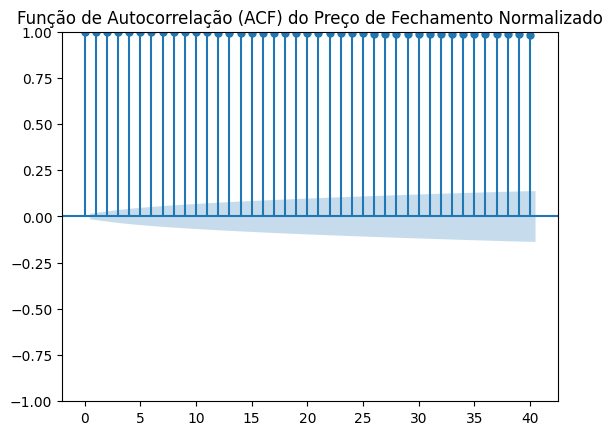

<Figure size 1400x700 with 0 Axes>

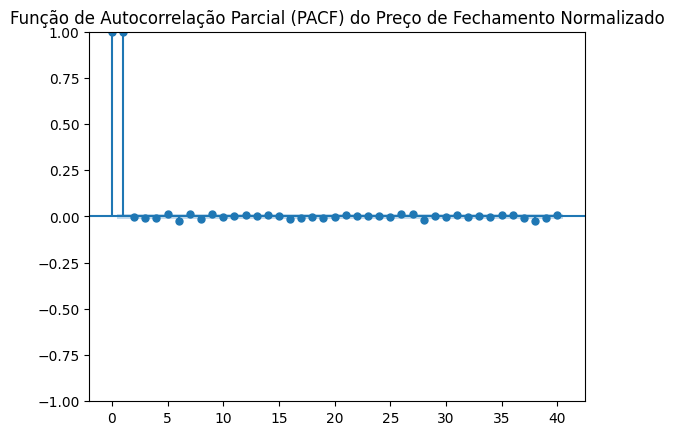

In [18]:
plt.figure(figsize=(14, 7))
plot_acf(df['Close'], lags=40)
plt.title('Função de Autocorrelação (ACF) do Preço de Fechamento Normalizado')
plt.show()

plt.figure(figsize=(14, 7))
plot_pacf(df['Close'], lags=40)
plt.title('Função de Autocorrelação Parcial (PACF) do Preço de Fechamento Normalizado')
plt.show()